# California Housing Dataset Analysis
**Author:** Elen Tesfai   
**GitHub Repository:** [Your GitHub Link](https://github.com/Elen-tesfai/datafun-07-ml)

## Part 5 - Bonus
In this section, we will analyze the California Housing Dataset to practice machine learning skills.

## 1. Loading and Previewing the Dataset
This format clearly indicates it's the first section of your analysis

In [2]:
import pandas as pd

# Load the dataset from the archive folder
housing_data = pd.read_csv(r"C:\Users\su_te\Documents\datafun-07-ml\archive (2)\housing.csv")

# Display the first few rows of the dataset
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


## 2. Data Overview
You can start by displaying a summary of the data and its statistics:


In [3]:
# Display basic information about the dataset
housing_data.info()

# Get a summary of the dataset
housing_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## 3. Data Cleaning
Check for any missing values and decide how to handle them:

In [4]:
# Check for missing values
missing_values = housing_data.isnull().sum()
print(missing_values)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


## 4. Data Visualization
Visualize the relationships in the dataset. For example, you can create scatter plots or histograms:

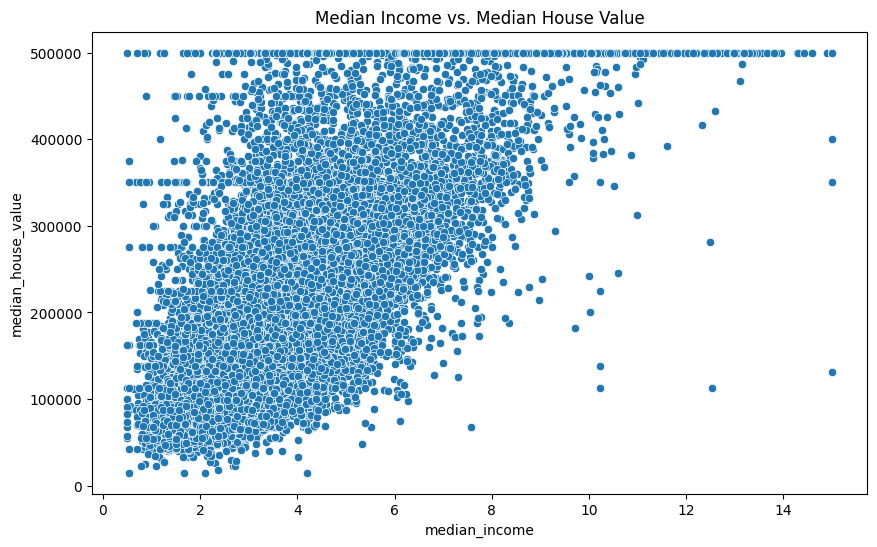

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for median income vs. median house value
plt.figure(figsize=(10, 6))
sns.scatterplot(data=housing_data, x='median_income', y='median_house_value')
plt.title('Median Income vs. Median House Value')
plt.show()

## 5. Model Building
In this section, we will define our features and target variable, then split the dataset into training and testing sets.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target
X = housing_data[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]
y = housing_data['median_house_value']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 2484035195.2572675
R^2 Score: 0.8104381733867658


## 6. Feature Importance Analysis
In this section, we will analyze which features are most influential in predicting the median house value.